# Project Business Statistics: E-news Express

## Description Background:


An online news portal aims to expand its business by acquiring new subscribers. Every visitor to the website takes certain actions based on their interest. The company plans to analyze these interests and wants to determine whether a new feature will be effective or not. Companies often analyze users' responses to two variants of a product to decide which of the two variants is more effective. This experimental technique is known as a/b testing that is used to determine whether a new feature attracts users based on a chosen metric.

Suppose you are hired as a Data Scientist in E-news Express. The design team of the company has created a new landing page. You have been assigned the task to decide whether the new landing page is more effective to gather new subscribers. Suppose you randomly selected 100 users and divided them equally into two groups. The old landing page is served to the first group (control group) and the new landing page is served to the second group (treatment group). Various data about the customers in both groups are collected in 'abtest.csv'. Perform the statistical analysis to answer the following questions using the collected data.

 ## Objective:

* Explore the dataset and extract insights using Exploratory Data Analysis.
* Do the users spend more time on the new landing page than the old landing page?
* Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
* Does the converted status depend on the preferred language? 
* Is the mean time spent on the new page same for the different language users?
* Consider a significance level of 0.05 for all tests.

## Data Dictionary:



* user_id - This represents the user ID of the person visiting the website.
* group - This represents whether the user belongs to the first group (control) or the second group (treatment).
* landing_page - This represents whether the landing page is new or old.
* time_spent_on_the_page - This represents the time (in minutes) spent by the user on the landing page.
* converted - This represents whether the user gets converted to a subscriber of the news portal or not.
* language_preferred - This represents the language chosen by the user to view the landing page.

### Import the required libraries

In [1]:
#import the important packages
import pandas as pd #library used for data manipulation and analysis
import numpy as np # library used for working with arrays.
import matplotlib.pyplot as plt # library for plots and visualisations
import seaborn as sns # library for visualisations
%matplotlib inline 
# Stats library contains a large number of probability distributions as well as a growing library of statistical functions.
import scipy.stats as stats 
import warnings
warnings.filterwarnings('ignore')


### Reading the Data into the Dataframe

In [2]:
# read the data
df = pd.read_csv('abtest.csv')

## Understanding the structure of the data

### View the first few rows of the dataset

In [3]:
# returns the first 5 rows
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


#### Observations:

The DataFrame has 6 columns as mentioned in the Data Dictionary. Data in each row corresponds to the information pertaining to each user.

### Check the shape of the dataset

In [4]:
# check the shape of the dataset
df.shape

(100, 6)

#### Observations:

* The DataFrame has 100 rows and 6 columns.

### Check the info()

In [5]:
# use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


#### Observations:
* There are a total of 100 non-null observations in each of the columns.

* The dataset contains 6 columns: 4 are of object type ('group', 'landing_page', 'converted ', 'language_preferred '), 1 is of integer type ('user_id ') and 1 is of the float type ('time_spent_on_the_page').

* Total memory usage is approximately 4.8+ KB.

## Data Preprocessing

In [6]:
# checking for missing values
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

#### Observations:
* There are no missing values in the dataset.

### Fixing the datatypes

In [7]:
# coverting "objects" to "category" reduces the data space required to store the dataframe
# converting 'group', 'landing_page', 'converted' and 'language_preferred' into categorical data

df.group = df.group.astype('category')     # Convert group from object to category
df.landing_page = df.landing_page.astype('category')           # Convert landing_page from object to category
df.converted = df.converted.astype('category')     # Convert converted from object to category
df.language_preferred = df.language_preferred.astype('category')     # Convert language_preferred from object to category

# use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   user_id                 100 non-null    int64   
 1   group                   100 non-null    category
 2   landing_page            100 non-null    category
 3   time_spent_on_the_page  100 non-null    float64 
 4   converted               100 non-null    category
 5   language_preferred      100 non-null    category
dtypes: category(4), float64(1), int64(1)
memory usage: 2.6 KB


#### Observations:
* 'group', 'landing_page', 'converted' and 'language_preferred' are now converted into categorical data
* The total memory usage has reduced from 4.86+ KB to 2.6 KB

### Statistical Summary of the dataset

In [8]:
# get the summary statistics of the numerical data
df.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


#### Observations:
* user_id is just an identifier.
* On an average, a customer is spending just over 5 minutes on the landing page.
* As observed, mean and median are almost of the same value suggesting a normal distribution for the data.
* 75% of the customers are spending less than 7 minutes on the landing page.
* There are customers on both sides of the spectrum spending less than a minute to almost 10 minutes.

In [9]:
# get the summary statistics of the non numerical data
df.describe(exclude=[np.number])

,group,landing_page,converted,language_preferred
count,100,100,100,100
unique,2,2,2,3
top,control,new,yes,French
freq,50,50,54,34


#### Observations:
* Users are divided equally into two groups - control and treatment.
* They are having a one-on-one relationship with the landing page: control group is aligned to old landing page while the treatment group to new landing page, as described in the background.
* There are more converted users than non-converted.
* There are 3 languages available as per the data in the landing page, out of which French is the most preferred language by the users. As this is a snapshot, an in-depth analysis would give us further insight into the data.

## Exploratory Data Analysis (EDA)

#### Function to plot a boxplot and a histogram along the same scale

In [10]:
def histogram_boxplot(data, feature, title, xlabel, figsize=(12, 7), kde=True, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="grey"
    ).set(title=title, xlabel=xlabel)  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    ).set(xlabel=xlabel)  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

#### Function to create labeled barplots

In [11]:
def labeled_barplot(data, feature, title, xlabel, ylabel, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()  # show the plot

## Univariate Analysis
#### By stats and plots

## User ID

In [12]:
# check unique user_id
df['user_id'].value_counts().shape

(100,)

#### Observations:
* There are no repeat IDs and we can say that each user is unique.

## Group 

In [13]:
# check the unique values
df['group'].value_counts()

control      50
treatment    50
Name: group, dtype: int64

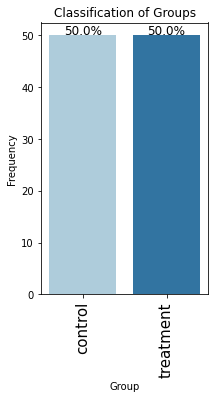

In [14]:
# Using the labeled_barplot function
labeled_barplot(df, 'group', 'Classification of Groups', 'Group', 'Frequency', perc=True)

#### Observations:
* As mentioned in the background, the users are divided into two equal groups of 50.

## Landing Page             

In [15]:
# check the unique values
df['landing_page'].value_counts()

new    50
old    50
Name: landing_page, dtype: int64

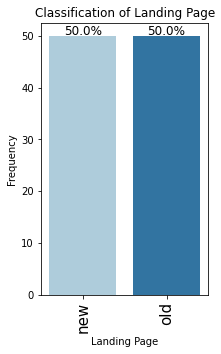

In [16]:
# Using the labeled_barplot function
labeled_barplot(df, 'landing_page', 'Classification of Landing Page', 'Landing Page', 'Frequency', perc=True)

#### Observations:
* As observered before, the users are distributed between the old and new landing page equally.

## Time Spent on the Page           

In [17]:
# check the unique values
df['time_spent_on_the_page'].describe()

count    100.000000
mean       5.377800
std        2.378166
min        0.190000
25%        3.880000
50%        5.415000
75%        7.022500
max       10.710000
Name: time_spent_on_the_page, dtype: float64

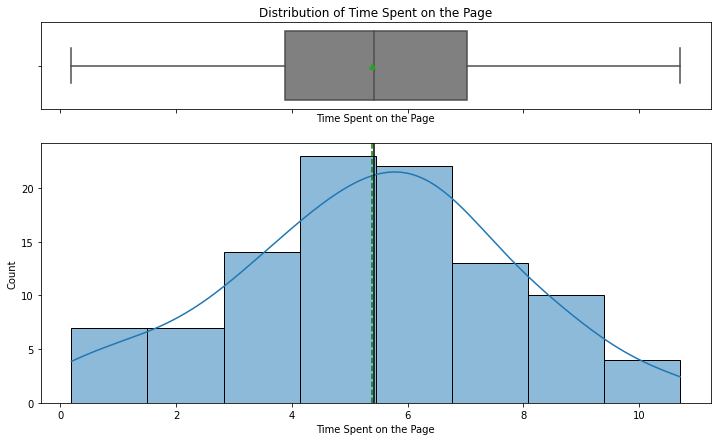

In [18]:
# Using the histogram_boxplot function
histogram_boxplot(df, 'time_spent_on_the_page', 'Distribution of Time Spent on the Page', 'Time Spent on the Page')
plt.savefig('time',dpi=300,bbox_inches='tight')

#### Observations:
* Mean and median values for this parameter are close together, as seen in the statistics.
* The above said observation and the nature of the distribution describes the sample to be of normal distribution. Thus we can assume that the population from which this sample came is also of normal distribution.

#### Number of users more than the mean amount of time on the landing page.

In [19]:
# Find customers whose time_spent_on_the_page is more than the mean
df_greater_than_mean = df[df['time_spent_on_the_page'] > df['time_spent_on_the_page'].mean()]

# Calculate the number of persons whose time_spent_on_the_page is more than mean

print('The number of persons whose time spent on the page more than mean is:', df_greater_than_mean.shape[0])

# Calculate percentage 
percentage = (df_greater_than_mean.shape[0] / df.shape[0]) * 100

print("Percentage :", round(percentage, 2), '%')

The number of persons whose time spent on the page more than mean is: 53
Percentage : 53.0 %


In [20]:
# Finding the number of users categorized by old or new landing page in the set of users who spend more than
# the average time spent.
df_greater_than_mean['landing_page'].value_counts()

new    34
old    19
Name: landing_page, dtype: int64

#### Observations:
* More than 60% of the users, who spent more than the mean amount of time spend on the landing page, are of the treatment group or uses the new landing page.

In [21]:
# Finding the number of users who got converted in the set of users who spend more than the average time spent.
df_greater_than_mean['converted'].value_counts()

yes    43
no     10
Name: converted, dtype: int64

#### Observations:
* The above stats tell us that when a user spend more amount of time on the landing page they tend to get converted to subscribers.

In [22]:
#Find the user_id which has maximum time_spent_on_the_page
df[df['time_spent_on_the_page']==df['time_spent_on_the_page'].max()]

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
8,546461,treatment,new,10.71,yes,French


#### Observations:
* The user who has spent the most amount of time on the landing page was using the French language and has converted to a subscriber

## Number of users who are now converted

In [23]:
# check the unique values
df['converted'].value_counts()

yes    54
no     46
Name: converted, dtype: int64

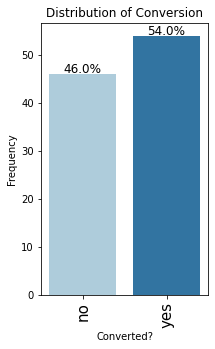

In [24]:
# Using the labeled_barplot function
labeled_barplot(df, 'converted', 'Distribution of Conversion', 'Converted?', 'Frequency', perc=True)

#### Observations:
* 54% of the total users chose to be subscribers after visiting the landing page irrespective of the page being old or new.

## Preferred Language

In [25]:
# check the unique values
df['language_preferred'].value_counts()

French     34
Spanish    34
English    32
Name: language_preferred, dtype: int64

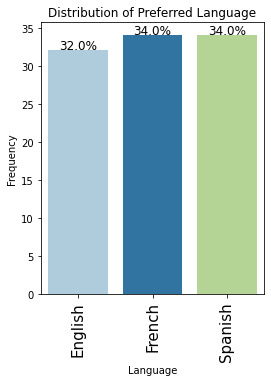

In [26]:
# Using the labeled_barplot function
labeled_barplot(df, 'language_preferred', 'Distribution of Preferred Language', 'Language', 'Frequency', perc=True)

#### Observations:
* As noted before, even though we saw French to have the most number of users, now we can see that there are equal number of users for French and Spanish. 
* Even then there is no notable difference in the number of users for the three languages that are being offered by the company.

## Multivariate Analysis

## Relationship between Groups and Time spent

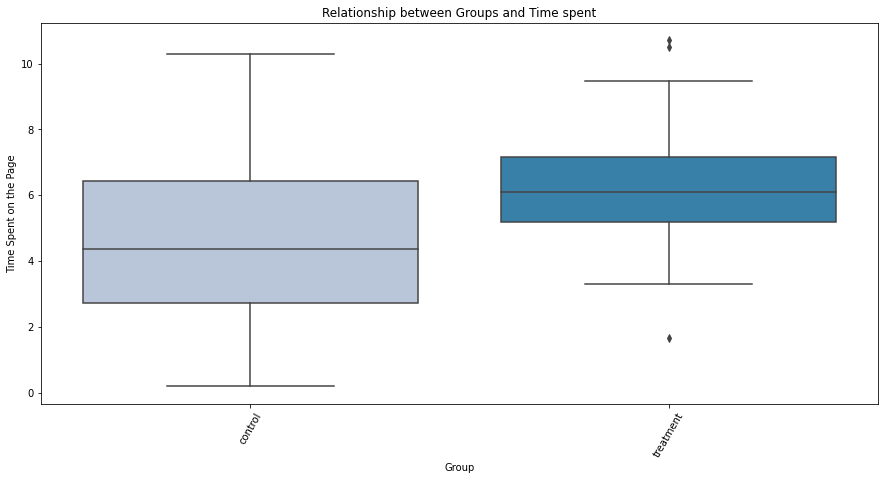

In [27]:
plt.figure(figsize=(15,7)) # Applying size of the figure
sns.boxplot(x = "group", y = "time_spent_on_the_page", data = df, palette = 'PuBu') # Using boxplot from Seaborn
plt.xticks(rotation = 60)
plt.title('Relationship between Groups and Time spent')
plt.xlabel('Group')
plt.ylabel('Time Spent on the Page')
plt.show()

#### Observations:
* The users in the treatment group, who are using the new landing page, are spending more time on their page.
* Average time spent by the treatment group is higher than the average time spent by control group.

### Relationship between landing page and time spent on the page

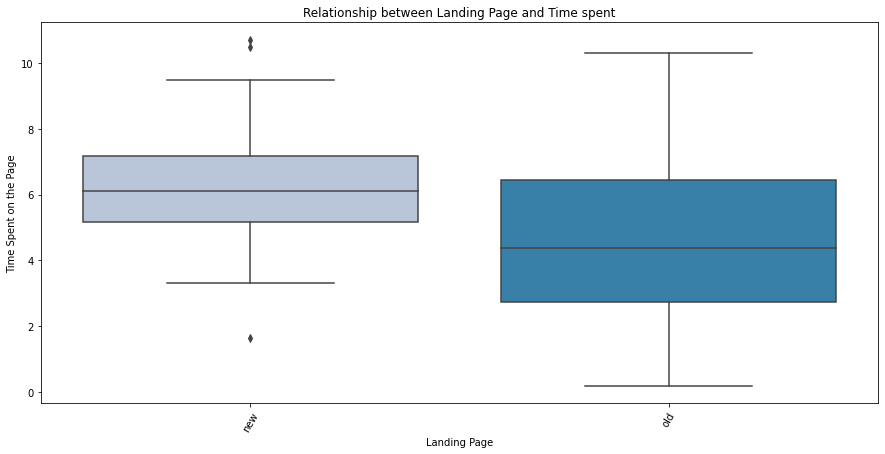

In [28]:
plt.figure(figsize=(15,7))
sns.boxplot(x = "landing_page", y = "time_spent_on_the_page", data = df, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.title('Relationship between Landing Page and Time spent')
plt.xlabel('Landing Page')
plt.ylabel('Time Spent on the Page')
plt.show()

#### Observations:
* Users spent more time on the new landing page than the old page.
* This could be seen in the relationship between groups and time spent as groups have a one-to-one relation with landing page.

### Relationship between converted and  time spent on the page

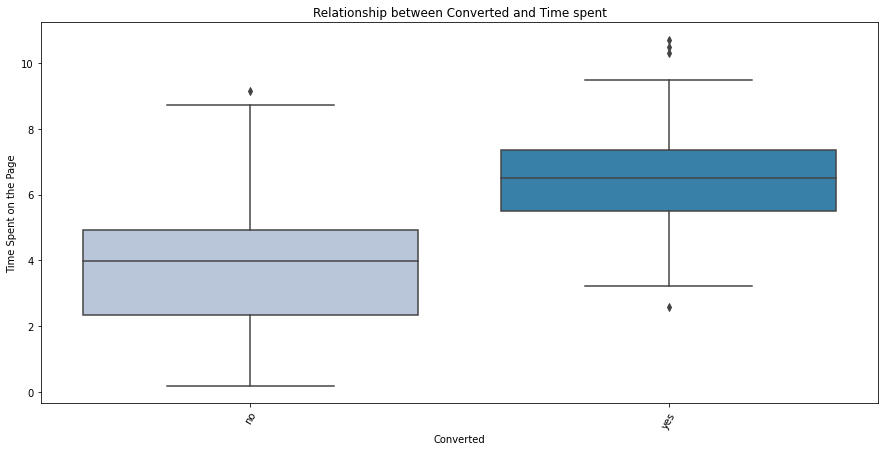

In [29]:
plt.figure(figsize=(15,7))
sns.boxplot(x = "converted", y = "time_spent_on_the_page", data = df, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.title('Relationship between Converted and Time spent')
plt.xlabel('Converted')
plt.ylabel('Time Spent on the Page')
plt.show()

#### Observations:
* The average time spent by users who are converting themselves to subscribers are more than the ones who are not.

### Relationship between preferred language and time spent on the page

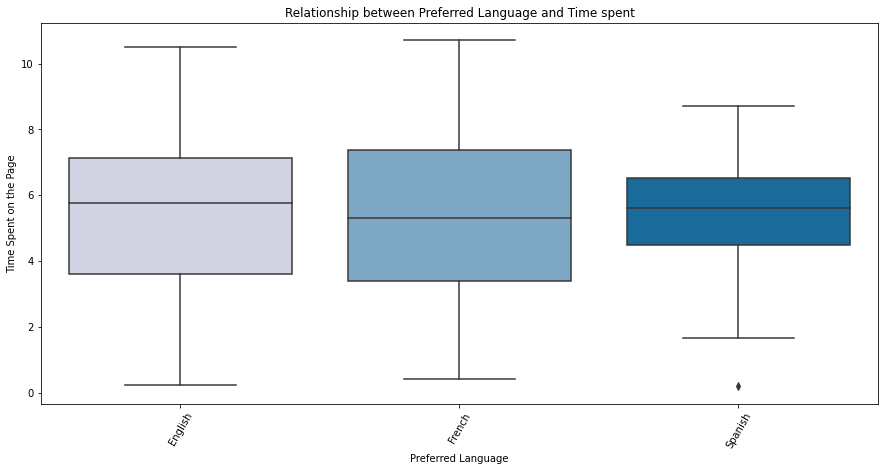

In [30]:
plt.figure(figsize=(15,7))
sns.boxplot(x = "language_preferred", y = "time_spent_on_the_page", data = df, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.title('Relationship between Preferred Language and Time spent')
plt.xlabel('Preferred Language')
plt.ylabel('Time Spent on the Page')
plt.show()

#### Observations:
* Users are spending around the same amount of time on the landing page irrespective of the language preferred.
* The mean time spent on the page for English language is the largest followed by Spanish and lastly French

### Relationship between landing_page and conversion

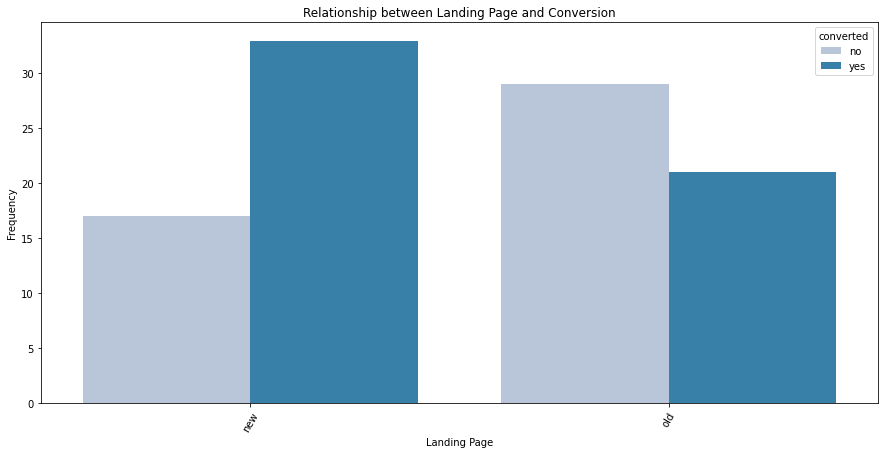

In [31]:
plt.figure(figsize=(15,7))
sns.countplot(df["landing_page"],hue=df["converted"],palette='PuBu')
plt.xticks(rotation = 60)
plt.title('Relationship between Landing Page and Conversion')
plt.xlabel('Landing Page')
plt.ylabel('Frequency')
plt.show()

#### Observations: 
* The new landing page has an higher conversion rate than the old landing page
* Most of the users that visited the new landing page were converted. However, this conversion is not reflecting for users landing on the old page.

### Relationship between Conversion and preferred language

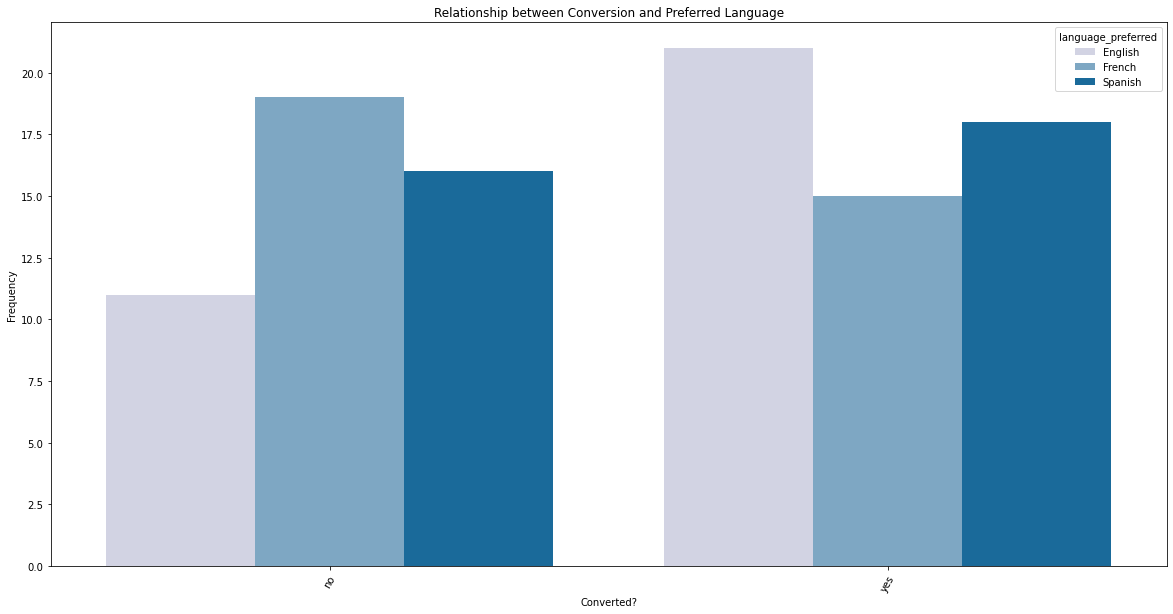

In [32]:
plt.figure(figsize=(20,10))
sns.countplot(df["converted"],hue=df["language_preferred"],palette='PuBu')
plt.xticks(rotation = 60)
plt.title('Relationship between Conversion and Preferred Language')
plt.xlabel('Converted?')
plt.ylabel('Frequency')
plt.show()

#### Observations:
* Users preferring English language are the most converted ones among all the languages.
* French seem to have the least conversion rate

### Relationship between Conversion, Time Spent and preferred language

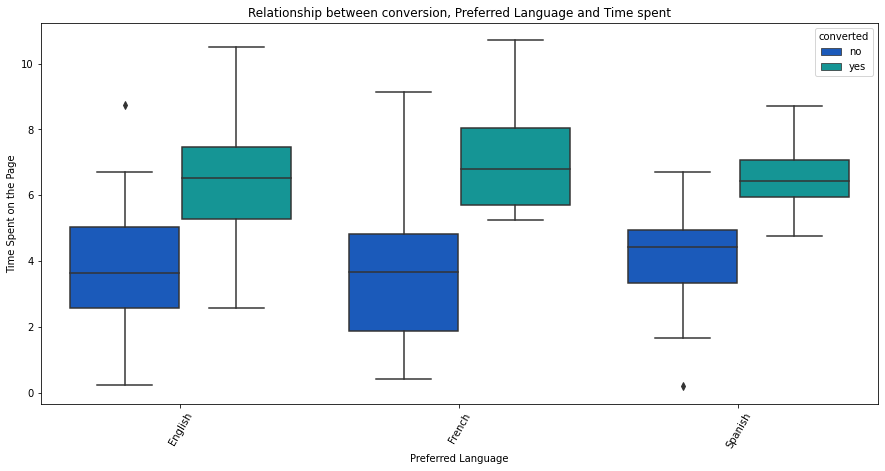

In [33]:
plt.figure(figsize=(15,7))
sns.boxplot(x = "language_preferred", y = "time_spent_on_the_page", hue="converted", data = df, palette = 'winter')
plt.xticks(rotation = 60)
plt.title('Relationship between conversion, Preferred Language and Time spent')
plt.xlabel('Preferred Language')
plt.ylabel('Time Spent on the Page')
plt.show()

#### Observations:
* Regardless of the language chosen, users spending more time on the landing page has become converted. 
* Users who are not getting converted tend to spend lesser time on the page.

### Relationship between landing page, Time Spent and preferred language

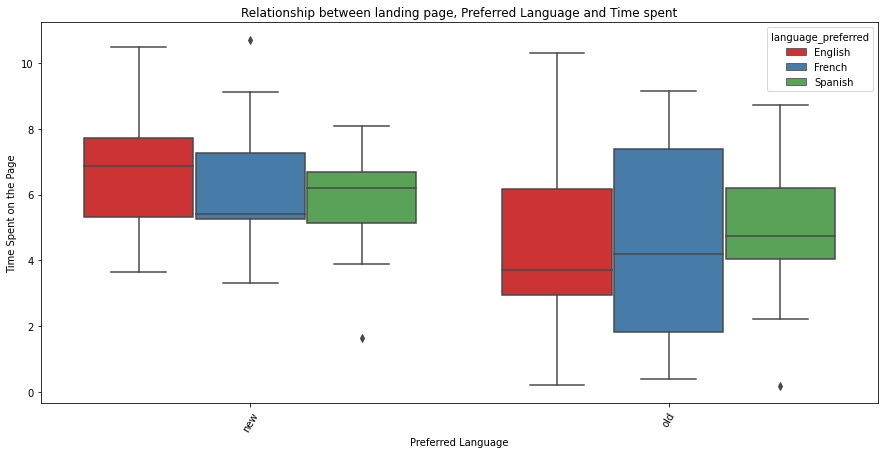

In [34]:
plt.figure(figsize=(15,7))
sns.boxplot(x = "landing_page", y = "time_spent_on_the_page", hue="language_preferred", data = df, palette = 'Set1')
plt.xticks(rotation = 60)
plt.title('Relationship between landing page, Preferred Language and Time spent')
plt.xlabel('Preferred Language')
plt.ylabel('Time Spent on the Page')
plt.show()

#### Observations:
* As can be seen from the visual display, users tend to spend more time on the new landing page than old landing page, irrespective of the language they are preferring.
* However, we are not able to come to a specific conclusion of whether a language is preferred over the other on any landing page.

## Do the users spend more time on the new landing page than the old landing page?

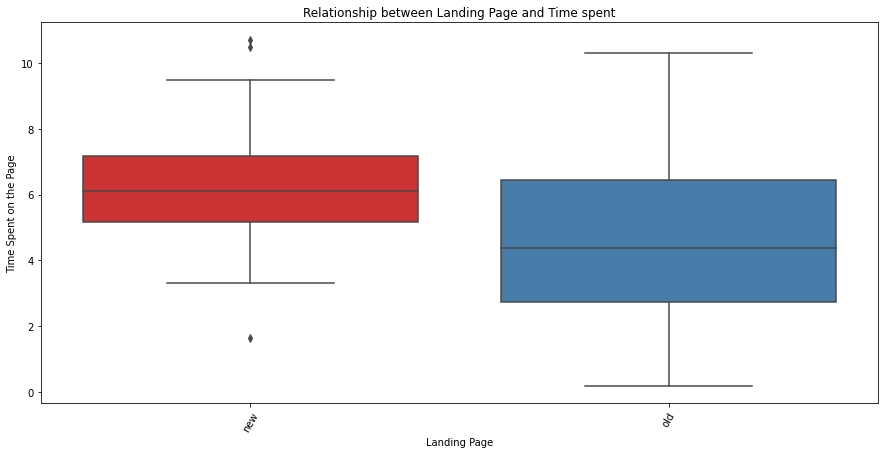

In [35]:
# Visual Analysis 
plt.figure(figsize=(15,7))
sns.boxplot(x = "landing_page", y = "time_spent_on_the_page", data = df, palette = 'Set1')
plt.xticks(rotation = 60)
plt.title('Relationship between Landing Page and Time spent')
plt.xlabel('Landing Page')
plt.ylabel('Time Spent on the Page')
plt.show()

#### Visual analysis observation:
* As observed from the plot, Users spend more time on the new landing page than the old one.
* Let's do an in-depth analysis to figure out the same.

## Statistical Analysis

## <a name='link9'>**Two Independent Sample T-test for Equality of Means - Unequal Std Dev**</a>

### Let's define the null and alternative hypothesis
Let $\mu_1, \mu_2$ be the mean time spent by a user on the new landing page and old landing page respectively.

We will test the null hypothesis

>$H_0:\mu_1=\mu_2$

against the alternate hypothesis

>$H_a:\mu_1>\mu_2$


### Select the appropriate test
The appropriate test would be Two independent Sample T-test for Equality of Means - Unequal Standard deviation

### Decide the significance level
Consider a significance level of 0.05.

### Prepare data for the test

In [36]:
# find the sample means and sample standard deviations for the time spent on new and old landing page 

print('The mean time spent by a user on the new landing page is ' + 
      str(round(df[df['landing_page']=='new'].time_spent_on_the_page.mean(),2)))

print('The mean time spent by a user on the old landing page is ' + 
      str(round(df[df['landing_page']=='old'].time_spent_on_the_page.mean(),2)))

print('The standard deviation of time spent by a user on the new landing page is  ' + 
      str(round(df[df['landing_page']=='new'].time_spent_on_the_page.std(),2)))

print('The standard deviation of time spent by a user on the old landing page is ' + 
      str(round(df[df['landing_page']=='old'].time_spent_on_the_page.std(),2)))

The mean time spent by a user on the new landing page is 6.22
The mean time spent by a user on the old landing page is 4.53
The standard deviation of time spent by a user on the new landing page is  1.82
The standard deviation of time spent by a user on the old landing page is 2.58


### Let's test whether the T-test assumptions are satisfied or not

* Continuous data - Yes, the time spent is measured on a continuous scale.
* Normally distributed populations - Yes, we have seen in the visualisation that the time spent on the landing page is  normally distributed.
* Independent populations - As we are taking random samples for two different groups, the two samples are from two independent populations.
* Unequal population standard deviations - As the sample standard deviations are different, the population standard deviations may be assumed to be different.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.
* As the assumptions are satisfied, We can use Two independent sample T-test for Equality of means - unequal standard deviation.

### Let's find the p-value

In [37]:
#import the required functions
from scipy.stats import ttest_ind

# find the p-value
test_stat, p_value = ttest_ind(df[df['landing_page']=='new'].time_spent_on_the_page, 
                               df[df['landing_page']=='old'].time_spent_on_the_page, 
                               equal_var = False, alternative = 'greater')
print('The p-value is ', p_value)

The p-value is  0.0001392381225166549


### Compare the p-value with $\alpha$

In [38]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0001392381225166549 is less than the level of significance, we reject the null hypothesis.


### Insight
As the p-value (~0.000139) is less than the level of significance, we can reject the null hypothesis. Hence, we do have enough evidence to support the claim that on an average, users spend more time on the new landing page.

## Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

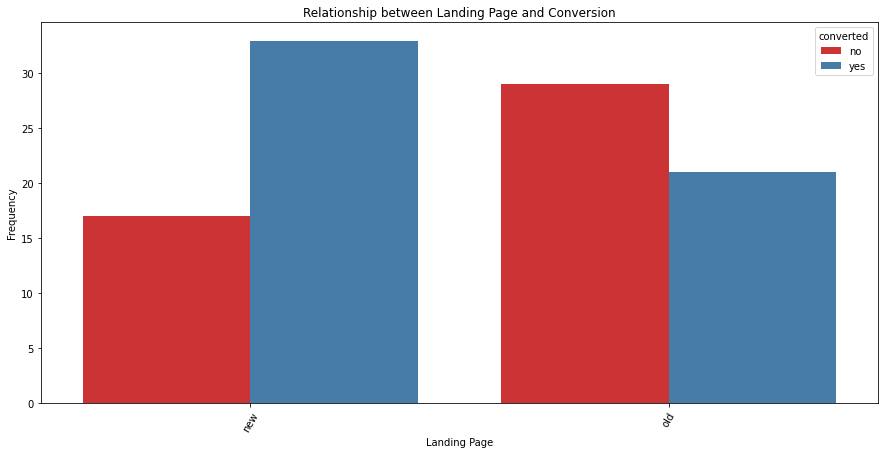

In [39]:
#Visual Analysis
plt.figure(figsize=(15,7))
sns.countplot(df["landing_page"],hue=df["converted"],palette='Set1')
plt.xticks(rotation = 60)
plt.title('Relationship between Landing Page and Conversion')
plt.xlabel('Landing Page')
plt.ylabel('Frequency')
plt.show()

#### Observations:
* The number of users who got converted after visiting the new landing page is more than that of old landing page.
* An in-depth analysis is required for further verification.

## Statistical Analysis

## <a name='link11'>**Two Proportion Z-test**</a>

### Let's write the null and alternative hypothesis
Let $p_1,p_2$ be the proportions of users who visit the landing page and get converted for the new page and old page respectively.

We can test the test null hypothesis

>$H_0:p_1 =p_2$

against the alternate hypothesis

>$H_a:p_1 > p_2$

### Select appropriate test
The appropriate test would be two proportion Z test.

### Decide the significanc level
We choose a significance level $\alpha\$ = 0.05

### Prepare the data for the test

In [40]:
# To find the number of users converted from the old and new landing page
print(df.groupby("converted")["landing_page"].value_counts())

converted  landing_page
no         old             29
           new             17
yes        new             33
           old             21
Name: landing_page, dtype: int64


#### Observations:
* The number of users converted from the new landing page = 33
* The number of users converted from the old landing page = 21
* The total number of users who visited the new landing page = 50
* The total number of users who visited the old landing page = 50

In [41]:
# To find the proportion of users who visited the landing page and got converted
print('A proportion of' ,round(33/50,2), 'users who visited the new landing page got converted.') 
print('A proportion of' ,round(21/50,2), 'users who visited the new landing page got converted.')

A proportion of 0.66 users who visited the new landing page got converted.
A proportion of 0.42 users who visited the new landing page got converted.


### Let's test whether the Z-test assumptions are satisfied or not

*   Binomally distributed population - Yes, the users who visit the landing page can get converted or not.
*   Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.  
*   Can the binomial distribution approximated to normal distribution - Yes. For binary data, CLT works slower than usual. The standard thing is to check whether np and n(1-p) are greater than or equal to 10. Here, n and p refer to the sample size and sample proportion respectively.
>$np_1 = 50\cdot \frac{33}{50} =33 \geq 10\\
n(1-p_1) = 50 \cdot \frac{50-33}{50} =17 \geq 10 \\
np_2 = 50\cdot \frac{21}{50} =21 \geq 10\\
n(1-p_2) = 50 \cdot \frac{50-21}{50} =29 \geq 10 $


### Let's find the p-value

In [42]:
# import the required fuction
from statsmodels.stats.proportion import proportions_ztest

# set the counts of users who visit the landing page and get converted 
convert_count = np.array([33, 21])

# set the sample sizes
nobs = np.array([50, 50])

# find the p-value
test_stat, p_value = proportions_ztest(convert_count, nobs,alternative='larger')
print('The p-value is ' + str(p_value))

The p-value is 0.008026308204056278


### Compare the p-value with $\alpha\$

In [43]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


### Insight

As the p-value is less than the significance level 0.05, we can reject the null hypothesis. Thus, we have enough statistical evidence to say that proportion of users who visit the new landing page and get converted is greater than that of old landing page

## Does the converted status depend on the preferred language? 

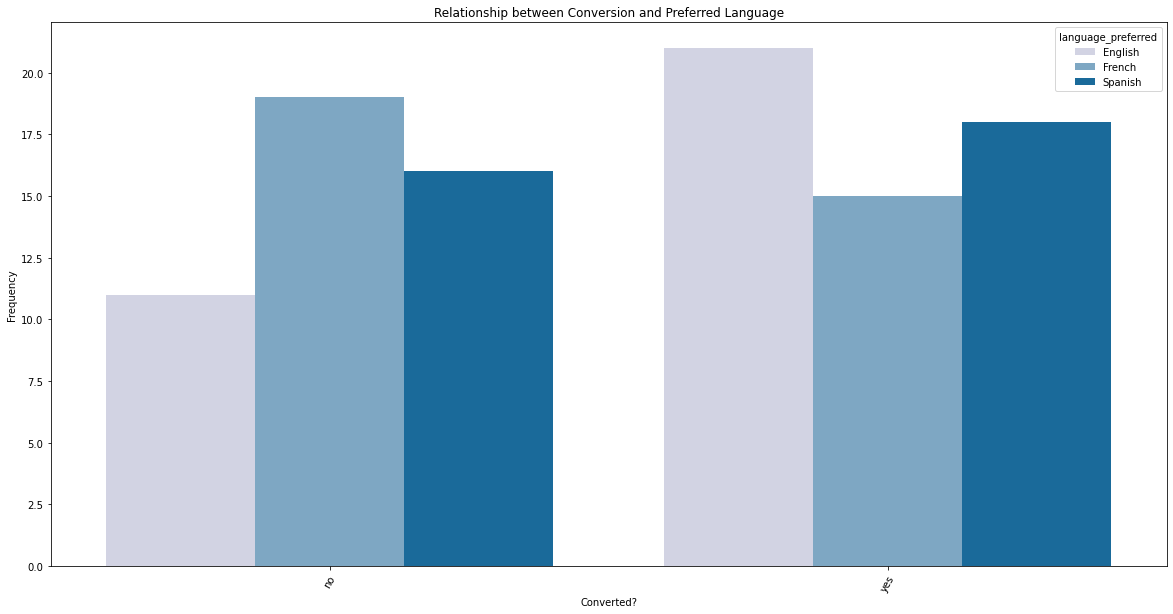

In [44]:
#Visual analysis
plt.figure(figsize=(20,10))
sns.countplot(df["converted"],hue=df["language_preferred"],palette='PuBu')
plt.xticks(rotation = 60)
plt.title('Relationship between Conversion and Preferred Language')
plt.xlabel('Converted?')
plt.ylabel('Frequency')
plt.show()

#### Observations:
* English language users have converted more as subscribers.
* Let us have a detailed analysis to find out whether conversion rate depends on preferred language or not.

## Statistical Analysis

## <a name='link14'>**Chi-Square Test for Independence**</a>

### Let's write the null and alternative hypothesis


We will test the null hypothesis

>$H_0:$ Converted status is independent of preffered language.

against the alternate hypothesis

>$H_a:$ Converted status depends on the preffered language.

### Let's test whether the assumptions are satisfied or not

* Categorical variables - Yes
* Expected value of the number of sample observations in each level of the variable is at least 5 - Yes, the number of observations in each level is greater than 5.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.


### Select appropriate test
Chi-square test for independence is the most appropriate test to find the relation between categorical variables.

### Decide significance level
We choose a significance level $\alpha\$ equal to 0.05.

### Prepare data for the test

#### Let's create a contingency table

In [45]:
#Create a contingency table of converted customers according to their preffered language
conti = pd.crosstab(df.converted, df.language_preferred)
conti

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


### Let us test whether assumptions are satisfied or not.
* Categorical variables - Yes (converted and language_preferred).
* Expected value of the number of sample observations in each level of the variable is at least 5 - Yes, the number of observations in each level is greater than 5.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.


### Let's find the p-value

In [46]:
# import the required function
from scipy.stats import chi2_contingency

# find the p-value
chi, p_value, dof, expected = chi2_contingency(conti)

# print the p-value
print('The p-value is', p_value)

The p-value is 0.21298887487543447


### Compare the p value with $\alpha\$


In [47]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.21298887487543447 is greater than the level of significance, we fail to reject the null hypothesis.


### Insight
As the p-value is much greater than the significance level, we fail to reject the null hypothesis. Hence, we do not have enough statistical significance to conclude that the converted status depends on the language preffered at 5% significance level.

## Is the mean time spent on the new page same for the different language users?

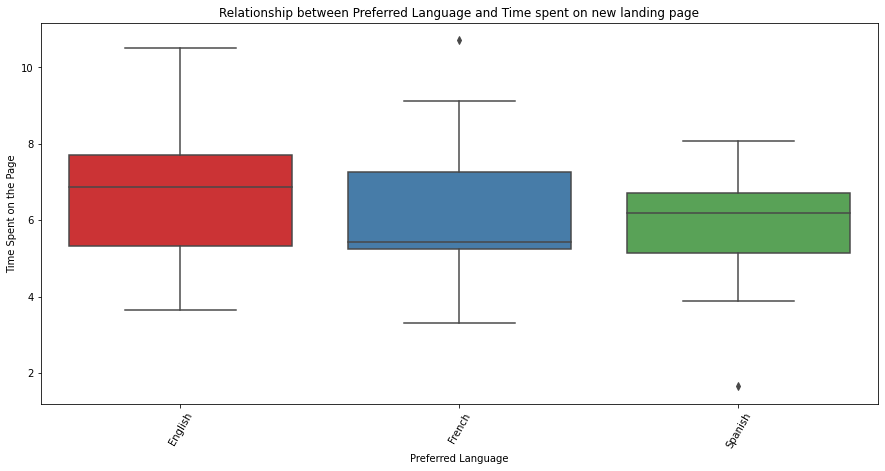

In [48]:
#Visual analysis
plt.figure(figsize=(15,7))
sns.boxplot(x = "language_preferred", y = "time_spent_on_the_page", data = df[df['landing_page']=='new'], palette = 'Set1')
plt.xticks(rotation = 60)
plt.title('Relationship between Preferred Language and Time spent on new landing page')
plt.xlabel('Preferred Language')
plt.ylabel('Time Spent on the Page')
plt.show()

#### Observations:
* Users are spending on an average around the same time on the landing page, old or new, and with this visualization we will not be able to come to a conclusion. So let's move to a statistical analysis of the same.

## Statistical Analysis

## <a name='link15'>**One-way ANOVA Test**</a>

### Let's write the null and alternative hypothesis

Let $\mu_1, \mu_2, \mu_3$ be the meantime spent on the page for French, Spanish and English respectively.

We will test the null hypothesis

>$H_0: \mu_1 = \mu_2 = \mu_3$

against the alternative hypothesis

>$H_a: $ At least one mean time spent is different from the rest.


### Select appropriate test
One-way ANOVA Test is the most appropriate test.

The normality and equality of variance assumptions need to be checked. 

* For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

* For equality of variance, Levene test is applied to the response variable.

### Normality Assumption check

### Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0:$ Time spent on the landing page follows a normal distribution

against the alternative hypothesis

>$H_a:$ Time spent on the landing page does not follow a normal distribution

In [49]:
# Assumption 1: Normality
# import the required function
from scipy import stats

# find the p-value
w, p_value = stats.shapiro(df[df['landing_page']=='new']['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.8040016293525696


#### Observations:
Since p-value of the test is very large, we fail to reject the null hypothesis that the response follows the normal distribution.

### Homogeniety of variance assumption check

### Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [50]:
#Assumption 2: Homogeneity of Variance

#import the required function

from scipy.stats import levene

statistic, p_value = levene( df[(df['landing_page'] == 'new') & (df['language_preferred'] == 'English')]
                            ['time_spent_on_the_page'],
    df[(df['landing_page'] == 'new') & (df['language_preferred'] == 'French')]
                            ['time_spent_on_the_page'],
    df[(df['landing_page'] == 'new') & (df['language_preferred'] == 'Spanish')]
                            ['time_spent_on_the_page'])

#find the p-value

print('The p-value is', p_value)

The p-value is 0.46711357711340173


#### Observations:
Since the p-value is large, we fail to reject the null hypothesis of homogeneity of variances.

### Let's test whether the assumptions are satisfied or not

* The populations are normally distributed - Yes, the normality assumption is verified using the Shapiro-Wilk’s test.
* Samples are independent simple random samples - Yes, we are informed that the collected sample is a simple random sample.
* Population variances are equal - Yes, the homogeneity of variance assumption is verified using the Levene's test.

### Decide significance level
We choose a significance level of 0.05.

### Prepare data for the test

In [51]:
new_page = df[df['landing_page']=='new']
English = new_page[new_page['language_preferred']=='English']['time_spent_on_the_page']
French = new_page[new_page['language_preferred']=='French']['time_spent_on_the_page']
Spanish = new_page[new_page['language_preferred']=='Spanish']['time_spent_on_the_page']

### Let's find the p-value

In [52]:
#import the required function
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway(English,French,Spanish)
print('The p-value is ' + str(p_value))

The p-value is 0.43204138694325955


### Compare p value with $\alpha\$

In [53]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'The p-value {p_value} is less than the level of significance. So, we reject the null hypothesis.')
else:
    print(f'The p-value {p_value} is greater than the level of significance. So, we fail to reject the null hypothesis.')

The p-value 0.43204138694325955 is greater than the level of significance. So, we fail to reject the null hypothesis.


### Insight

As the p-value is much greater than the significance level, we fail to reject the null hypothesis. Hence, we have enough statistical significance to conclude that mean time spent on the landing page is same for different language users at 5% significance level.

## Conclusion:
* When a user spend more amount of time on the landing page they tend to get converted to subscribers.
* 54% of the total users chose to be subscribers after visiting the landing page irrespective of the page being old or new.
* The users in the treatment group, who are using the new landing page, are spending more time on their page.
* The average time spent by users who are converting themselves to subscribers are more than the ones who are not.
* Users are spending around the same amount of time on the landing page irrespective of the language preferred.
* The new landing page has an higher conversion rate than the old landing page.
* The conversion rate is independent of the language preferred.

## Business Recommendations:
* Now that, it is statistically proven that users landing on the new page are getting converted to subscribers, we could officially replace the old landing page with the newer one.
* As we have seen, the presence of three different languages did not deter users from getting converted, there could be a chance that adding more languages could bring in more subscribers.
* Analysing in-depth about the demographics of the users could bring in more insights for user conversion.
* This would empower us to bring in demographic specific subscription offers on the landing page which will attract more users.